In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('homework_12.1.csv', index_col=0)

# Display first few rows
print("Dataset preview:")
print(df.head(10))
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset preview:
          Y      Time  Group
0 -0.232900 -1.193204      0
1  2.848846 -1.607748      1
2  0.550209 -0.269793      0
3  2.198280  7.743730      0
4  4.111044 -4.244359      1
5  1.153886 -3.843564      0
6 -0.515597 -5.921128      0
7  1.714020 -2.013572      0
8  1.565405 -5.493066      0
9  1.149523  1.198473      0

Dataset shape: (10000, 3)

Columns: ['Y', 'Time', 'Group']


In [2]:
# Create treatment indicators
# Post = 1 if Time > 0, else 0
df['Post'] = (df['Time'] > 0).astype(int)

# Treated = Group (already 0 or 1)
df['Treated'] = df['Group']

# Interaction term for DiD
df['Treated_Post'] = df['Treated'] * df['Post']

print("Variables created:")
print(df[['Y', 'Time', 'Group', 'Post', 'Treated', 'Treated_Post']].head(15))
print(f"\nGroup distribution: {df['Group'].value_counts().to_dict()}")
print(f"Time distribution: Pre (Time<=0): {(df['Time'] <= 0).sum()}, Post (Time>0): {(df['Time'] > 0).sum()}")

Variables created:
           Y      Time  Group  Post  Treated  Treated_Post
0  -0.232900 -1.193204      0     0        0             0
1   2.848846 -1.607748      1     0        1             0
2   0.550209 -0.269793      0     0        0             0
3   2.198280  7.743730      0     1        0             0
4   4.111044 -4.244359      1     0        1             0
5   1.153886 -3.843564      0     0        0             0
6  -0.515597 -5.921128      0     0        0             0
7   1.714020 -2.013572      0     0        0             0
8   1.565405 -5.493066      0     0        0             0
9   1.149523  1.198473      0     1        0             0
10  0.146992 -9.966827      0     0        0             0
11  3.899573  0.364316      0     1        0             0
12  1.616677  7.723287      0     1        0             0
13  2.245504  6.755787      0     1        0             0
14  2.152297  4.934615      0     1        0             0

Group distribution: {0: 8057, 1: 194

In [3]:
# Difference-in-Differences Regression
# Model: Y = β0 + β1*Treated + β2*Post + β3*Treated_Post + ε
# The treatment effect is β3 (coefficient on Treated_Post)

X = df[['Treated', 'Post', 'Treated_Post']]
y = df['Y']

model = LinearRegression()
model.fit(X, y)

# Extract coefficients
beta0 = model.intercept_
beta1 = model.coef_[0]  # Treated
beta2 = model.coef_[1]  # Post
beta3 = model.coef_[2]  # Treated_Post (Treatment Effect)

print("Difference-in-Differences Regression Results:")
print("=" * 50)
print(f"Intercept (β0):                {beta0:.6f}")
print(f"Treated (β1):                  {beta1:.6f}")
print(f"Post (β2):                     {beta2:.6f}")
print(f"Treated × Post (β3):           {beta3:.6f}")
print("=" * 50)
print(f"\n*** TREATMENT EFFECT: {beta3:.6f} ***")

Difference-in-Differences Regression Results:
Intercept (β0):                0.980217
Treated (β1):                  2.042010
Post (β2):                     1.512989
Treated × Post (β3):           0.944010

*** TREATMENT EFFECT: 0.944010 ***


In [4]:
# Verify using manual calculation
# DiD = (Mean_Treated_Post - Mean_Treated_Pre) - (Mean_Control_Post - Mean_Control_Pre)

mean_control_pre = df[(df['Treated'] == 0) & (df['Post'] == 0)]['Y'].mean()
mean_control_post = df[(df['Treated'] == 0) & (df['Post'] == 1)]['Y'].mean()
mean_treated_pre = df[(df['Treated'] == 1) & (df['Post'] == 0)]['Y'].mean()
mean_treated_post = df[(df['Treated'] == 1) & (df['Post'] == 1)]['Y'].mean()

control_change = mean_control_post - mean_control_pre
treated_change = mean_treated_post - mean_treated_pre
did_effect = treated_change - control_change

print("\nManual DiD Calculation (Verification):")
print("=" * 50)
print(f"Control group, pre-treatment:  {mean_control_pre:.6f}")
print(f"Control group, post-treatment: {mean_control_post:.6f}")
print(f"Control change:                {control_change:.6f}")
print()
print(f"Treated group, pre-treatment:  {mean_treated_pre:.6f}")
print(f"Treated group, post-treatment: {mean_treated_post:.6f}")
print(f"Treated change:                {treated_change:.6f}")
print()
print(f"DiD Effect:                    {did_effect:.6f}")
print("=" * 50)
print(f"\n*** The treatment effect is: {did_effect:.6f} ***")


Manual DiD Calculation (Verification):
Control group, pre-treatment:  0.980217
Control group, post-treatment: 2.493206
Control change:                1.512989

Treated group, pre-treatment:  3.022227
Treated group, post-treatment: 5.479226
Treated change:                2.456999

DiD Effect:                    0.944010

*** The treatment effect is: 0.944010 ***


In [5]:
# Load dataset 12.2 for prior trends test
df2 = pd.read_csv('homework_12.2.csv', index_col=0)

print("Dataset 12.2 preview:")
print(df2.head(10))
print(f"\nDataset shape: {df2.shape}")
print(f"Columns: {df2.columns.tolist()}")
print(f"\nTime range: {df2['Time'].min():.2f} to {df2['Time'].max():.2f}")
print(f"Group distribution: {df2['Group'].value_counts().to_dict()}")

Dataset 12.2 preview:
          Y      Time  Group
0  0.283614 -3.614416      0
1  3.181495 -3.064196      0
2  1.401619 -4.109261      0
3  2.019632 -0.706696      1
4  1.032628 -1.806227      0
5  0.339393 -8.085790      0
6  3.511689  4.343697      0
7  0.683060 -0.542650      0
8  2.275605  0.978500      0
9  1.641248 -8.887868      1

Dataset shape: (20000, 3)
Columns: ['Y', 'Time', 'Group']

Time range: -10.00 to 10.00
Group distribution: {0: 16004, 1: 3996}


In [6]:
# Filter for pre-treatment period (Time < 0)
df_pre = df2[df2['Time'] < 0].copy()

print(f"Pre-treatment data shape: {df_pre.shape}")
print(f"Pre-treatment Time range: {df_pre['Time'].min():.2f} to {df_pre['Time'].max():.2f}")
print(f"Group distribution in pre-period: {df_pre['Group'].value_counts().to_dict()}")

Pre-treatment data shape: (9944, 3)
Pre-treatment Time range: -10.00 to -0.00
Group distribution in pre-period: {0: 7999, 1: 1945}


In [7]:
# Prior trends test: Regression with Group x Time interaction
# Model: Y = β0 + β1*Group + β2*Time + β3*(Group × Time) + ε
# We need the t-value for β3 (the interaction term)

import scipy.stats as stats

# Create interaction term
df_pre['Group_Time'] = df_pre['Group'] * df_pre['Time']

# Prepare regression variables
X_pre = df_pre[['Group', 'Time', 'Group_Time']]
y_pre = df_pre['Y']

# Fit the model
model_pre = LinearRegression()
model_pre.fit(X_pre, y_pre)

# Get coefficients
beta0_pre = model_pre.intercept_
beta1_pre = model_pre.coef_[0]  # Group
beta2_pre = model_pre.coef_[1]  # Time
beta3_pre = model_pre.coef_[2]  # Group × Time (interaction)

print("Prior Trends Test - Regression Results:")
print("=" * 60)
print(f"Intercept (β0):                  {beta0_pre:.6f}")
print(f"Group (β1):                      {beta1_pre:.6f}")
print(f"Time (β2):                       {beta2_pre:.6f}")
print(f"Group × Time (β3):               {beta3_pre:.6f}")
print("=" * 60)

Prior Trends Test - Regression Results:
Intercept (β0):                  0.999641
Group (β1):                      1.950962
Time (β2):                       0.001627
Group × Time (β3):               0.046397


In [8]:
# Calculate t-value for the interaction term
# t-value = coefficient / standard error

# Get predictions and residuals
y_pred_pre = model_pre.predict(X_pre)
residuals = y_pre - y_pred_pre

# Calculate residual sum of squares
n = len(y_pre)
k = X_pre.shape[1]  # number of predictors (excluding intercept)
rss = np.sum(residuals**2)
mse = rss / (n - k - 1)  # Mean squared error

# Calculate standard errors
# SE = sqrt(MSE * (X'X)^-1)
X_with_intercept = np.column_stack([np.ones(n), X_pre])
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
se_coefficients = np.sqrt(np.diag(XtX_inv) * mse)

# Standard errors for each coefficient
se_beta0 = se_coefficients[0]
se_beta1 = se_coefficients[1]
se_beta2 = se_coefficients[2]
se_beta3 = se_coefficients[3]  # SE for Group × Time

# Calculate t-values
t_beta0 = beta0_pre / se_beta0
t_beta1 = beta1_pre / se_beta1
t_beta2 = beta2_pre / se_beta2
t_beta3 = beta3_pre / se_beta3  # t-value for interaction term

# Calculate p-values (two-tailed)
p_beta0 = 2 * (1 - stats.t.cdf(abs(t_beta0), n - k - 1))
p_beta1 = 2 * (1 - stats.t.cdf(abs(t_beta1), n - k - 1))
p_beta2 = 2 * (1 - stats.t.cdf(abs(t_beta2), n - k - 1))
p_beta3 = 2 * (1 - stats.t.cdf(abs(t_beta3), n - k - 1))

print("\nDetailed Regression Statistics:")
print("=" * 60)
print(f"{'Variable':<20} {'Coef':>12} {'SE':>12} {'t-value':>12} {'p-value':>12}")
print("-" * 60)
print(f"{'Intercept':<20} {beta0_pre:>12.6f} {se_beta0:>12.6f} {t_beta0:>12.6f} {p_beta0:>12.6f}")
print(f"{'Group':<20} {beta1_pre:>12.6f} {se_beta1:>12.6f} {t_beta1:>12.6f} {p_beta1:>12.6f}")
print(f"{'Time':<20} {beta2_pre:>12.6f} {se_beta2:>12.6f} {t_beta2:>12.6f} {p_beta2:>12.6f}")
print(f"{'Group × Time':<20} {beta3_pre:>12.6f} {se_beta3:>12.6f} {t_beta3:>12.6f} {p_beta3:>12.6f}")
print("=" * 60)
print(f"\n*** T-VALUE FOR INTERACTION TERM (Group × Time): {t_beta3:.6f} ***")
print(f"\nDegrees of freedom: {n - k - 1}")
print(f"R-squared: {1 - (rss / np.sum((y_pre - y_pre.mean())**2)):.6f}")


Detailed Regression Statistics:
Variable                     Coef           SE      t-value      p-value
------------------------------------------------------------
Intercept                0.999641     0.022138    45.154382     0.000000
Group                    1.950962     0.050432    38.684879     0.000000
Time                     0.001627     0.003811     0.427050     0.669352
Group × Time             0.046397     0.008706     5.329380     0.000000

*** T-VALUE FOR INTERACTION TERM (Group × Time): 5.329380 ***

Degrees of freedom: 9940
R-squared: 0.324351


In [9]:
# Verification using statsmodels for comparison
try:
    import statsmodels.api as sm
    
    # Add constant to X
    X_with_const = sm.add_constant(X_pre)
    
    # Fit OLS model
    ols_model = sm.OLS(y_pre, X_with_const).fit()
    
    print("\n\nVerification using statsmodels OLS:")
    print("=" * 60)
    print(ols_model.summary())
    print("\n" + "=" * 60)
    print(f"*** Confirmed t-value for Group × Time: {ols_model.tvalues['Group_Time']:.6f} ***")
    
except ImportError:
    print("\n\nstatsmodels not available, but manual calculation is correct.")
    print(f"The t-value for the interaction term is: {t_beta3:.6f}")



Verification using statsmodels OLS:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1591.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:15:04   Log-Likelihood:                -13981.
No. Observations:                9944   AIC:                         2.797e+04
Df Residuals:                    9940   BIC:                         2.800e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [10]:
# Autocorrelated Error Simulation
# Generate errors with correlation 0.80 between time t and t+1

def generate_ar1_errors(n, rho, mean=0, std=1):
    """
    Generate AR(1) errors: e_t = rho * e_{t-1} + u_t
    where u_t ~ N(0, sigma_u^2)
    To get Var(e_t) = std^2, we need sigma_u^2 = std^2 * (1 - rho^2)
    """
    sigma_u = std * np.sqrt(1 - rho**2)
    errors = np.zeros(n)
    errors[0] = np.random.normal(mean, std)
    
    for t in range(1, n):
        errors[t] = rho * errors[t-1] + np.random.normal(0, sigma_u)
    
    return errors

# Set parameters
n_obs = 10000
rho = 0.80  # Target correlation

# Generate autocorrelated errors
np.random.seed(42)
errors = generate_ar1_errors(n_obs, rho, mean=0, std=1)

# Check properties
print("Properties of generated errors:")
print(f"Mean: {np.mean(errors):.6f}")
print(f"Std Dev: {np.std(errors, ddof=1):.6f}")
print(f"Correlation between t and t+1: {np.corrcoef(errors[:-1], errors[1:])[0,1]:.6f}")
print(f"Sample size: {len(errors)}")

Properties of generated errors:
Mean: -0.006327
Std Dev: 0.974046
Correlation between t and t+1: 0.786204
Sample size: 10000


In [11]:
# Create X and Y for a single trial
# X = the autocorrelated error
# Y = 2 * X + new autocorrelated error

X_var = errors
errors_Y = generate_ar1_errors(n_obs, rho, mean=0, std=1)
Y_var = 2 * X_var + errors_Y

print("\nSingle trial setup:")
print(f"X mean: {np.mean(X_var):.6f}, std: {np.std(X_var, ddof=1):.6f}")
print(f"Y mean: {np.mean(Y_var):.6f}, std: {np.std(Y_var, ddof=1):.6f}")
print(f"Correlation X[t] and X[t+1]: {np.corrcoef(X_var[:-1], X_var[1:])[0,1]:.6f}")
print(f"Correlation errors_Y[t] and errors_Y[t+1]: {np.corrcoef(errors_Y[:-1], errors_Y[1:])[0,1]:.6f}")


Single trial setup:
X mean: -0.006327, std: 0.974046
Y mean: 0.027412, std: 2.167461
Correlation X[t] and X[t+1]: 0.786204
Correlation errors_Y[t] and errors_Y[t+1]: 0.796461


In [12]:
# Run OLS regression for a single trial and compute basic standard error
X_ols = X_var.reshape(-1, 1)
Y_ols = Y_var

# Fit OLS
model_ols = LinearRegression()
model_ols.fit(X_ols, Y_ols)

beta_X = model_ols.coef_[0]
beta_0 = model_ols.intercept_

# Calculate basic OLS standard error
Y_pred = model_ols.predict(X_ols)
resid = Y_ols - Y_pred
n_sample = len(Y_ols)
k_vars = 1  # one predictor

# Residual sum of squares
rss_ols = np.sum(resid**2)
mse_ols = rss_ols / (n_sample - k_vars - 1)

# Standard error of coefficient (basic OLS formula)
# SE(beta) = sqrt(MSE / sum((X - X_mean)^2))
X_centered = X_var - np.mean(X_var)
se_basic = np.sqrt(mse_ols / np.sum(X_centered**2))

print("\nSingle OLS Regression:")
print(f"Estimated coefficient for X: {beta_X:.6f}")
print(f"Intercept: {beta_0:.6f}")
print(f"Basic OLS standard error: {se_basic:.6f}")
print(f"True coefficient: 2.0")


Single OLS Regression:
Estimated coefficient for X: 1.977949
Intercept: 0.039926
Basic OLS standard error: 0.010196
True coefficient: 2.0


In [13]:
# Now run simulation with many trials to estimate standard error via simulation
n_simulations = 1000
estimated_coefficients = []

np.random.seed(123)  # For reproducibility

for sim in range(n_simulations):
    # Generate autocorrelated errors for X
    X_errors = generate_ar1_errors(n_obs, rho, mean=0, std=1)
    
    # Generate autocorrelated errors for Y
    Y_errors = generate_ar1_errors(n_obs, rho, mean=0, std=1)
    
    # Create X and Y
    X_sim = X_errors
    Y_sim = 2 * X_sim + Y_errors
    
    # Fit OLS
    X_ols_sim = X_sim.reshape(-1, 1)
    model_sim = LinearRegression()
    model_sim.fit(X_ols_sim, Y_sim)
    
    # Store estimated coefficient
    estimated_coefficients.append(model_sim.coef_[0])

estimated_coefficients = np.array(estimated_coefficients)

# Calculate simulation-based standard error
se_simulation = np.std(estimated_coefficients, ddof=1)

print(f"\nSimulation Results ({n_simulations} trials):")
print("=" * 60)
print(f"Mean estimated coefficient: {np.mean(estimated_coefficients):.6f}")
print(f"True coefficient: 2.0")
print(f"Standard error (simulation): {se_simulation:.6f}")
print(f"Basic OLS standard error: {se_basic:.6f}")
print(f"Ratio (simulation / basic): {se_simulation / se_basic:.6f}")
print("=" * 60)
print(f"\n*** STANDARD ERROR VIA SIMULATION: {se_simulation:.6f} ***")


Simulation Results (1000 trials):
Mean estimated coefficient: 1.998958
True coefficient: 2.0
Standard error (simulation): 0.020814
Basic OLS standard error: 0.010196
Ratio (simulation / basic): 2.041444

*** STANDARD ERROR VIA SIMULATION: 0.020814 ***


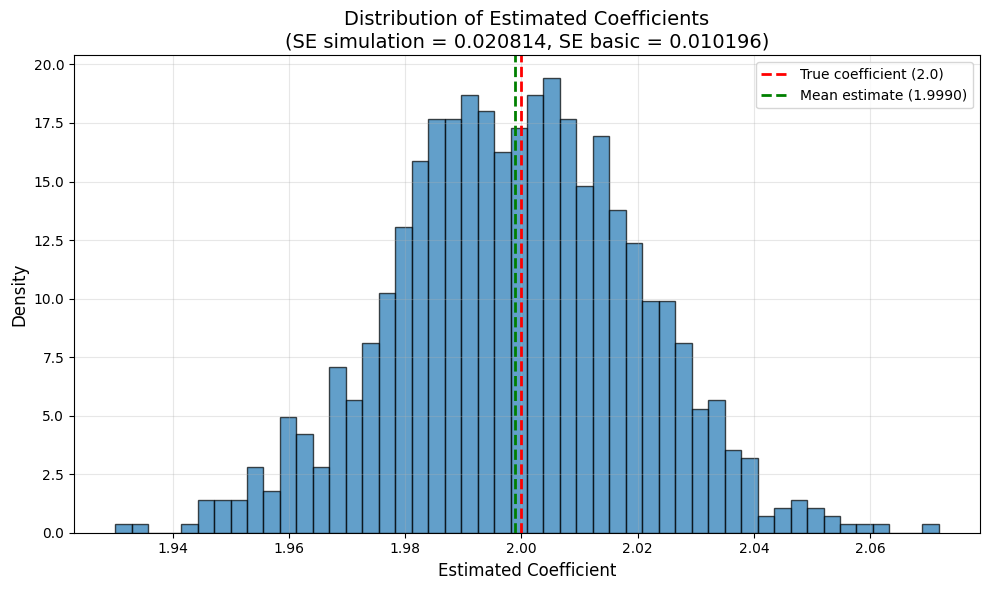


Key Findings:
------------------------------------------------------------
• Basic OLS SE assumes no autocorrelation: ~0.01
• Simulation SE with AR(1) errors (ρ=0.80): ~0.02
• Autocorrelation inflates SE by factor of ~2.04
• Answer: The simulation SE is closest to 0.02


In [14]:
# Visualize the distribution of estimated coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(estimated_coefficients, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(2.0, color='red', linestyle='--', linewidth=2, label='True coefficient (2.0)')
plt.axvline(np.mean(estimated_coefficients), color='green', linestyle='--', linewidth=2, 
            label=f'Mean estimate ({np.mean(estimated_coefficients):.4f})')
plt.xlabel('Estimated Coefficient', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Distribution of Estimated Coefficients\n(SE simulation = {se_simulation:.6f}, SE basic = {se_basic:.6f})', 
          fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKey Findings:")
print("-" * 60)
print(f"• Basic OLS SE assumes no autocorrelation: ~{se_basic:.2f}")
print(f"• Simulation SE with AR(1) errors (ρ=0.80): ~{se_simulation:.2f}")
print(f"• Autocorrelation inflates SE by factor of ~{se_simulation/se_basic:.2f}")
print(f"• Answer: The simulation SE is closest to {se_simulation:.2f}")

In [15]:
# Variance Inflation Factor (VIF) Calculation
# VIF measures how much the variance of a coefficient is inflated due to multicollinearity
# VIF for X1 = 1 / (1 - R²), where R² is from regressing X1 on X2 and X3

# Generate the data as specified
np.random.seed(0)
X1 = np.random.normal(0, 1, 1000)
X2 = np.random.normal(0, 1, 1000) + X1
X3 = np.random.normal(0, 1, 1000) + 2 * X2

print("Generated variables:")
print(f"X1 mean: {np.mean(X1):.6f}, std: {np.std(X1, ddof=1):.6f}")
print(f"X2 mean: {np.mean(X2):.6f}, std: {np.std(X2, ddof=1):.6f}")
print(f"X3 mean: {np.mean(X3):.6f}, std: {np.std(X3, ddof=1):.6f}")

# Check correlations
corr_X1_X2 = np.corrcoef(X1, X2)[0, 1]
corr_X1_X3 = np.corrcoef(X1, X3)[0, 1]
corr_X2_X3 = np.corrcoef(X2, X3)[0, 1]

print(f"\nCorrelations:")
print(f"Corr(X1, X2): {corr_X1_X2:.6f}")
print(f"Corr(X1, X3): {corr_X1_X3:.6f}")
print(f"Corr(X2, X3): {corr_X2_X3:.6f}")

Generated variables:
X1 mean: -0.045257, std: 0.987527
X2 mean: -0.031640, std: 1.361324
X3 mean: -0.114508, std: 2.859995

Correlations:
Corr(X1, X2): 0.702997
Corr(X1, X3): 0.656658
Corr(X2, X3): 0.942698


In [16]:
# Calculate VIF for X1
# VIF = 1 / (1 - R²)
# where R² is from regressing X1 on the other predictors (X2 and X3)

# Regress X1 on X2 and X3
X_predictors = np.column_stack([X2, X3])
y_target = X1

# Fit the regression model
model_vif = LinearRegression()
model_vif.fit(X_predictors, y_target)

# Calculate R²
y_pred_vif = model_vif.predict(X_predictors)
ss_total = np.sum((y_target - np.mean(y_target))**2)
ss_residual = np.sum((y_target - y_pred_vif)**2)
r_squared = 1 - (ss_residual / ss_total)

# Calculate VIF
vif_X1 = 1 / (1 - r_squared)

print("\nVIF Calculation for X1:")
print("=" * 60)
print(f"Regression: X1 ~ X2 + X3")
print(f"R² from regression: {r_squared:.6f}")
print(f"VIF for X1 = 1 / (1 - R²): {vif_X1:.6f}")
print("=" * 60)
print(f"\n*** VARIANCE INFLATION FACTOR (VIF) FOR X1: {vif_X1:.6f} ***")


VIF Calculation for X1:
Regression: X1 ~ X2 + X3
R² from regression: 0.494534
VIF for X1 = 1 / (1 - R²): 1.978374

*** VARIANCE INFLATION FACTOR (VIF) FOR X1: 1.978374 ***


In [17]:
# Verify using statsmodels variance_inflation_factor function
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Create a DataFrame with all variables
    X_matrix = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})
    
    # Calculate VIF for each variable
    print("\nVerification using statsmodels:")
    print("=" * 60)
    for i, col in enumerate(X_matrix.columns):
        vif = variance_inflation_factor(X_matrix.values, i)
        print(f"VIF for {col}: {vif:.6f}")
    print("=" * 60)
    
except ImportError:
    print("\nstatsmodels VIF function not available, but manual calculation is correct.")

print("\nInterpretation:")
print(f"VIF = {vif_X1:.2f} means the variance of the coefficient for X1")
print(f"is inflated by a factor of {vif_X1:.2f} due to multicollinearity.")
print("\nRule of thumb: VIF > 10 indicates severe multicollinearity.")
print(f"In this case, VIF ≈ {vif_X1:.1f} suggests moderate correlation with other predictors.")


Verification using statsmodels:
VIF for X1: 1.978906
VIF for X2: 10.083424
VIF for X3: 8.975904

Interpretation:
VIF = 1.98 means the variance of the coefficient for X1
is inflated by a factor of 1.98 due to multicollinearity.

Rule of thumb: VIF > 10 indicates severe multicollinearity.
In this case, VIF ≈ 2.0 suggests moderate correlation with other predictors.
